In [41]:
import pandas as pd
import numpy as np
import pvlib
from pvlib.location import Location


In [154]:
tidszone = "Europe/Copenhagen"
start_dato = "2024-04-01"
slut_dato = "2024-04-30"
delta_tid = "Min"  # "Min", "H",

# Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
site = Location(
    55.7861111111, 12.5230555556, tidszone, 10, "DTU (DK)"
)  # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
times = pd.date_range(
    start_dato + " 00:00:00", slut_dato + " 23:59:00", inclusive="left", freq=delta_tid, tz=tidszone
)

In [155]:
# Estimate Solar Position with the 'Location' object
solpos = site.get_solarposition(times)

# Visualize the resulting DataFrame
solpos.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2024-04-01 00:00:00+02:00,117.721350,117.721350,-27.721350,-27.721350,339.130478,-3.866396
2024-04-01 00:01:00+02:00,117.770858,117.770858,-27.770858,-27.770858,339.406483,-3.866190
2024-04-01 00:02:00+02:00,117.819731,117.819731,-27.819731,-27.819731,339.682757,-3.865984
2024-04-01 00:03:00+02:00,117.867968,117.867968,-27.867968,-27.867968,339.959297,-3.865777
2024-04-01 00:04:00+02:00,117.915566,117.915566,-27.915566,-27.915566,340.236101,-3.865571


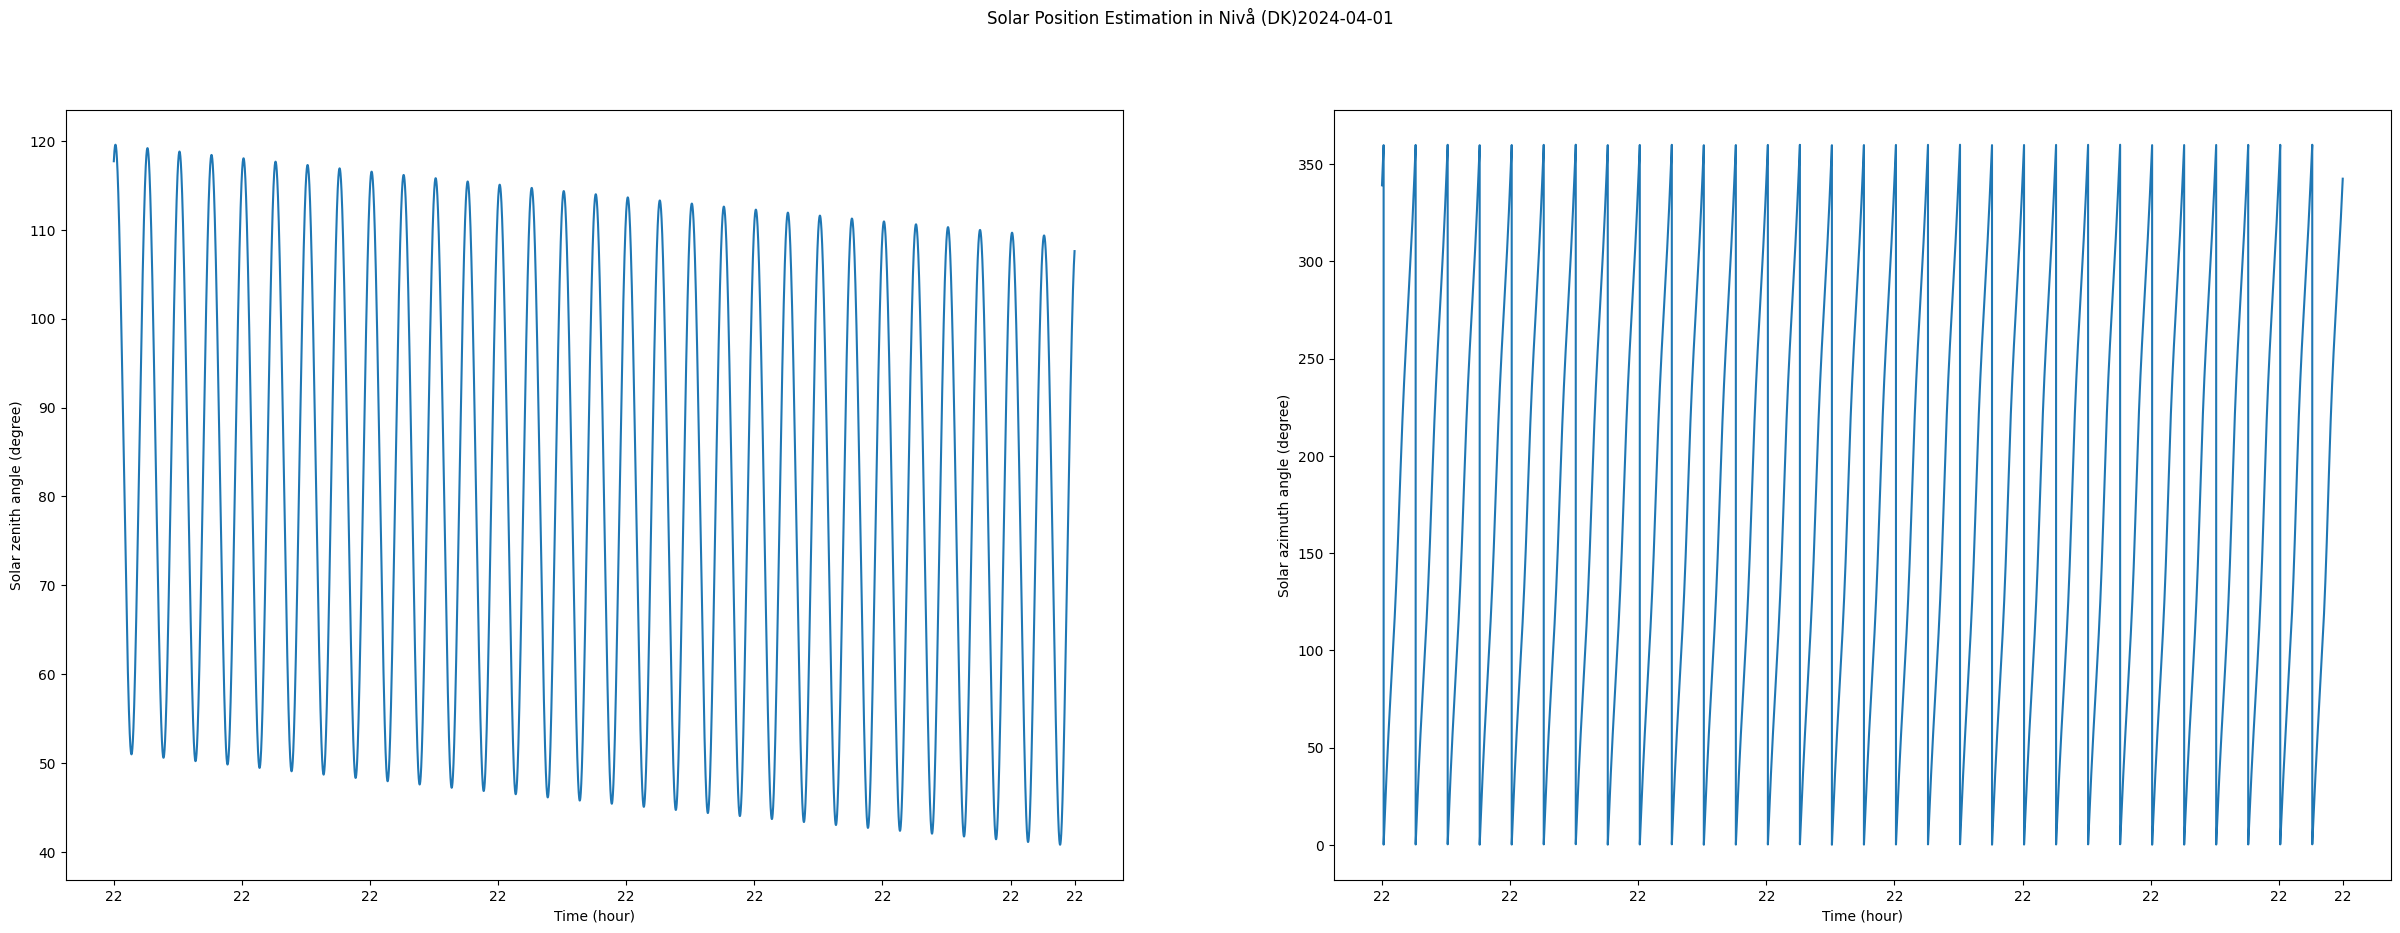

In [156]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

valgt_dato = "2024-04-01"

# Plots for solar zenith and solar azimuth angles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle("Solar Position Estimation in " + site.name + valgt_dato)

# plot for solar zenith angle
ax1.plot(solpos.loc[start_dato:slut_dato].zenith)
ax1.set_ylabel("Solar zenith angle (degree)")
ax1.set_xlabel("Time (hour)")
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

# plot for solar azimuth angle
ax2.plot(solpos.loc[start_dato:slut_dato].azimuth)
ax2.set_ylabel("Solar azimuth angle (degree)")
ax2.set_xlabel("Time (hour)")
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

In [165]:
valgt_dato = "2024-04-20"
zenithangs = np.array(solpos.loc[start_dato:slut_dato].zenith)
elevangs = np.array(solpos.loc[start_dato:slut_dato].elevation)
azimuthangs = np.array(solpos.loc[start_dato:slut_dato].azimuth)

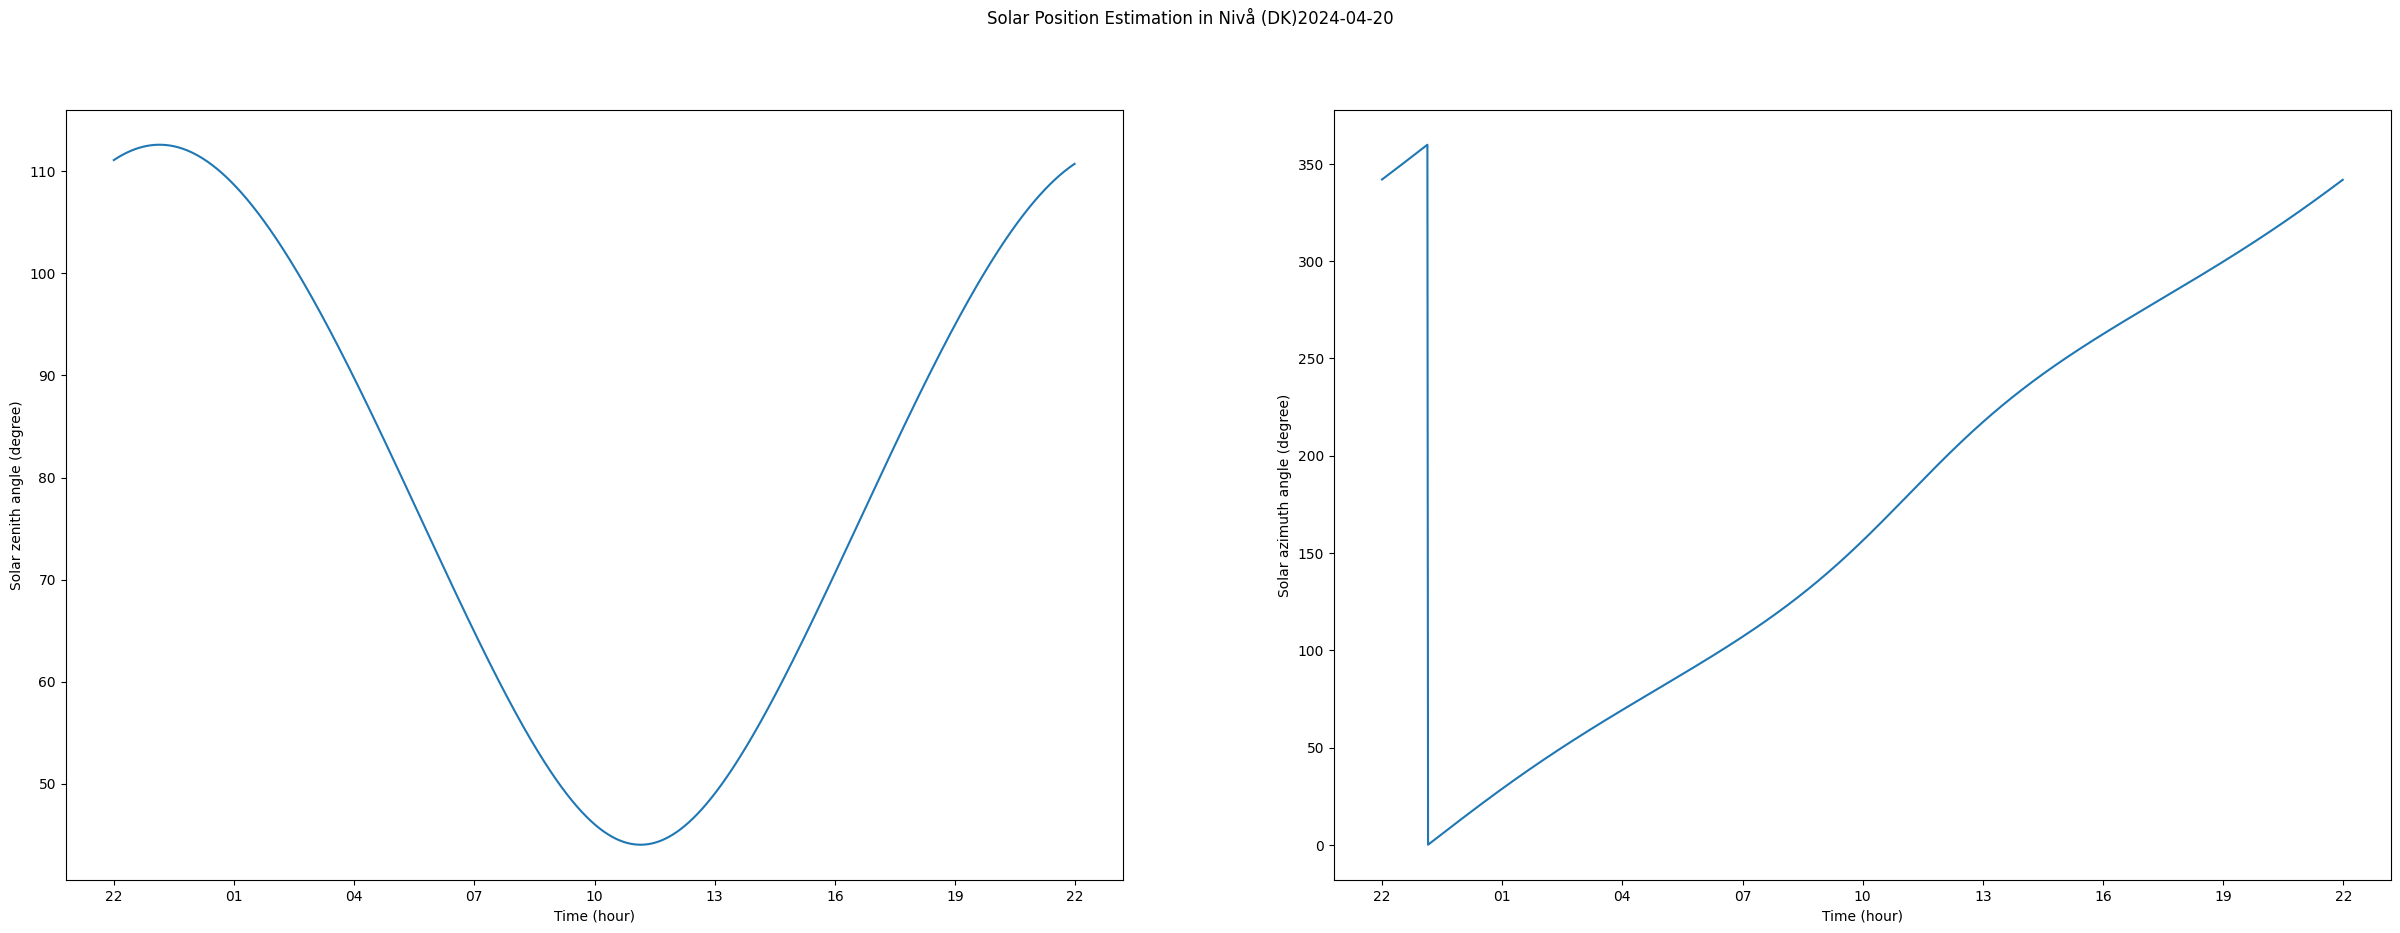

In [166]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

valgt_dato = "2024-04-20"

# Plots for solar zenith and solar azimuth angles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle("Solar Position Estimation in " + site.name + valgt_dato)

# plot for solar zenith angle
ax1.plot(solpos.loc[valgt_dato].zenith)
ax1.set_ylabel("Solar zenith angle (degree)")
ax1.set_xlabel("Time (hour)")
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

# plot for solar azimuth angle
ax2.plot(solpos.loc[valgt_dato].azimuth)
ax2.set_ylabel("Solar azimuth angle (degree)")
ax2.set_xlabel("Time (hour)")
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

In [169]:
# Finder solens højeste elevationsvinkel
positioner.max()

112.61376634625734

In [163]:
## Finder solopgang og solnedgang
positioner = np.array(solpos.loc[valgt_dato].apparent_zenith)
for i in range(0,len(positioner)):
    if (positioner[i] > 89.9) and (positioner[i] < 90.1):
        print("time",solpos.loc[valgt_dato].index[i],"zenith:",positioner[i])

time 2024-04-20 05:53:00+02:00 zenith: 90.07632705456788
time 2024-04-20 05:54:00+02:00 zenith: 89.96780887292519
time 2024-04-20 20:25:00+02:00 zenith: 89.99182360643897
time 2024-04-20 20:26:00+02:00 zenith: 90.09959727604594


In [176]:
# Finder sommersolhverv på dtu
tidszone = "Europe/Copenhagen"
start_dato = "2024-01-01"
slut_dato = "2024-12-31"
delta_tid = "Min"  # "Min", "H",

# Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
site = Location(
    55.7861111111, 0, tidszone, 10, "DTU (DK)"
)  # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
times = pd.date_range(
    start_dato + " 00:00:00", slut_dato + " 23:59:00", inclusive="left", freq=delta_tid, tz=tidszone
)
solpos = site.get_solarposition(times)
solpos.head()
elevangs = np.array(solpos.loc[start_dato:slut_dato].apparent_elevation)
print("Sol vinkel ved sommersolhverv på DTU:",elevangs.max())

Sol vinkel ved sommersolhverv på DTU: 57.66098432279944


In [198]:
def findMaxAngleOfSun(date, latitude):
    startDate = date[0:7] + str(int(date[7:8])-1)
    endDate = date[0:7] + str(int(date[7:8])+1)
    site = Location(
    latitude, 0, tidszone, 10, "Not set"
    )
    times = pd.date_range(
    start_dato + " 00:00:00", slut_dato + " 23:59:00", inclusive="left", freq=delta_tid, tz=tidszone
    )   
    solpos = site.get_solarposition(times)
    solpos.head()
    elevangs = np.array(solpos.loc[start_dato:slut_dato].apparent_elevation)
    print("Sol vinkel ved sommersolhverv :",elevangs.max())
    
findMaxAngleOfSun("02-01-12",)

Sol vinkel ved sommersolhverv : 23.47438701713715
